In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from IPython.display import Audio

tfrecords_filename = 'nsynth-test.tfrecord'

In [15]:
def nsynth_generator(tfrecords_filename):
    for serialized_example in tf.python_io.tf_record_iterator(tfrecords_filename):
        example = tf.train.Example()
        example.ParseFromString(serialized_example)
        f = example.features.feature

        audio = np.array(f['audio'].float_list.value)

        data = {
            'note':
                f['note'].int64_list.value[0],
            'note_str':
                f['note_str'].bytes_list.value[0],
            'instrument':
                f['instrument'].int64_list.value[0],
            'instrument_str':
                f['instrument_str'].bytes_list.value[0],
            'pitch':
                f['pitch'].int64_list.value[0],
            'velocity':
                f['pitch'].int64_list.value[0],
            'samplerate':
                f['sample_rate'].int64_list.value[0],
            'qualities':
                map(int, f['qualities'].int64_list.value),
            'qualities_str':
                map(str, f['qualities_str'].int64_list.value),
            'instrument_family':
                f['instrument_family'].int64_list.value[0],
            'instrument_family_str':
                f['instrument_family_str'].bytes_list.value[0],
            'instrument_source':
                f['instrument_family'].int64_list.value[0],
            'instrument_source_str':
                f['instrument_source_str'].bytes_list.value[0],
        }

        yield data, audio

In [19]:
gen_samples = nsynth_generator(tfrecords_filename)
metadata, audio = gen_samples.next()
print(metadata)

{'instrument_family': 0L, 'instrument_source': 0L, 'pitch': 100L, 'samplerate': 16000L, 'qualities_str': [], 'instrument_str': 'bass_synthetic_033', 'note': 149013L, 'instrument': 417L, 'note_str': 'bass_synthetic_033-100-100', 'qualities': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'instrument_source_str': 'synthetic', 'velocity': 100L, 'instrument_family_str': 'bass'}


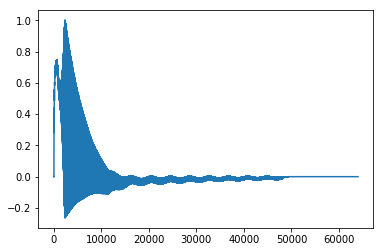

In [21]:
Audio(audio, rate=data['samplerate'])
plt.plot(audio)